Material elaborado por Ana Xavier, durante as aulas de Processamento Digitais de Imagens, ministradas pela Professora Dra. Carla Diniz L. Becker, para o curso de Informática Biomédica da Universidade Federal de Ciências da Saúde de Porto Alegre. - Feito no Google Colab

# **Aula 7 - Morfologia**
### 06/01/2022 [Síncrona]

##ELEMENTO ESTRUTURANTE
Elemento estruturante: pequenos conjuntos ou subimagens usadas para examinar uma imagem buscando propriedades de interesse

O ES caminha de pixel em pixel da image original, onde cada interação gera um pixel na nova imagem

Normalmente serão utilizados ES retangulares com origem no pixel central

#**PROCESSAMENTO MORFOLÓGICO DE IMAGENS**


### **Fit**: 
todos os pixels 1 no elemento estruturante cobrem uma área na imagem também com valores 1 (área segmentada) - encaixe perfeito! **Erosão**: utiliza a técnica morfológica Fit

### **Hit**: 
Qualquer pixel 1 do elemento estruturante cobre um elemento 1 da imagem. **Dilatação:** utiliza a técnica norfológica hit






Esses processos morfológicos, normalmente são utilizados para a remoção de imperfeições.


##**Erosão**: 
Definição: conjunto de todos os pontos z de forma com que B, transladado por z, fique contido em A

Aplicação: divisão de objetos e remoção de extrusões

Os objetos diminuem na erosão

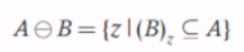

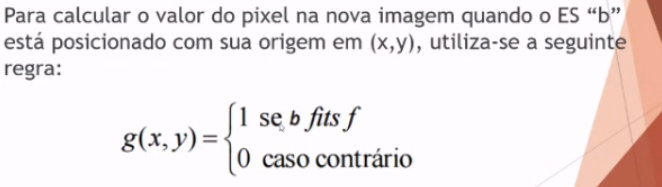

## **Dilatação:**
Definição: dilatação de A por B é o conjunto de todos os deslocamentos de z, tais que B refletido e A se sobreponham em pelo menos um elemento não nulo

Aplicação: fechar fendas e reparar instrusões
Os objetos aumentam após a aplicação da dilatação

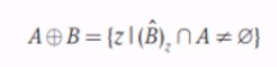

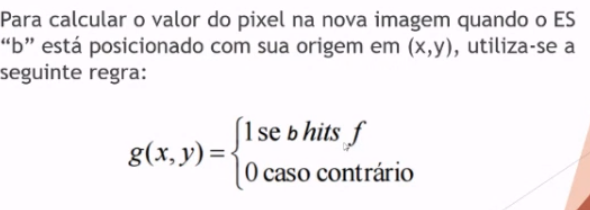

## Extração de Fronteiras
### Bordas internas - erosão
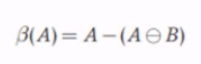

### Bordas externas - dilatação
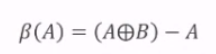

### Gradiente Morfológico
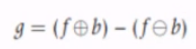

# Código

In [ ]:
#Bibliotecas
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np 
import PIL.Image as Image
plt.style.use("dark_background")

In [ ]:
# IMPORTAR A IMAGEM
img = cv2.imread('')
img = np.array(Image.open(r"D:\Users\malanga\mestrado\DL\Prática didática\Fig0905(a)(wirebond-mask).jpg"))

# NORMALIZAR A IMAGEM
img_n = (img - img.min())/(img.max()-img.min())

print("valor maxido de pixel da imagem original = ",img.max(), ', e valor maximo de pixel da imagem normalizada = ', img_n.max())

plt.figure(figsize = (10,10))
plt.imshow(img, cmap="Greys");

In [ ]:
#Montando a mao o Kernel
tey = np.array([[0,1,0],[1,1,1],[0,1,0]])
print('A mão =',tey)

# função pronta do kernel 
N = 10
KC= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #   Mascara em cruz
print('Função pronta= ',KC)

In [ ]:
# KERNEL (k) 
N = 23
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular 
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KR # escolha da mascara

erode = cv2.erode(img_n, KQ) 

plt.figure(figsize=[15,10]);
plt.subplot(1,2,1);plt.imshow(img, cmap='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(erode, cmap='gray');plt.title('imagem erodida',size=25);

In [ ]:
# IMPORTAR A IMAGEM
img2 = np.array(Image.open(r"D:\Users\malanga\mestrado\DL\Prática didática\Fig0907(a)(text_gaps_1_and_2_pixels).jpg"))
# NORMALIZAR A IMAGEM
img_n2 = (img2 - img2.min())/(img2.max()-img2.min())

plt.figure(figsize=(10,10))
plt.imshow(img2, cmap="Greys");

In [ ]:
# KERNEL (k) 
N = 3
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular 
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KC # escolha da mascara

dilate = cv2.dilate(img_n2, KQ, iterations=1) 

plt.figure(figsize=(18,10));
plt.subplot(1,2,1);plt.imshow(img_n2, cmap ='gray');plt.title('imagem original',size=25)
plt.subplot(1,2,2);plt.imshow(dilate, cmap ='gray');plt.title('imagem dilatada',size=25);